In [34]:
#@author-Tejasvi Sharma
#Implementing basic linear regression using sklearn
import pandas as pd
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448          

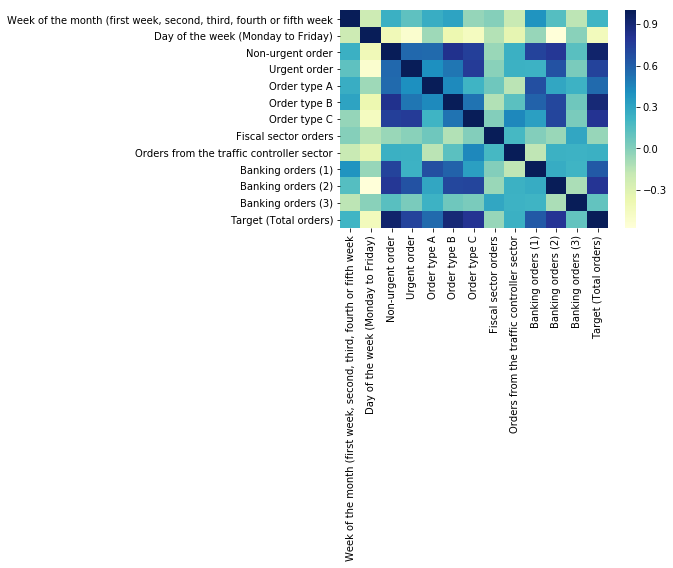

False
(60, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
Week of the month (first week, second, third, fourth or fifth week    60 non-null int64
Day of the week (Monday to Friday)                                    60 non-null int64
Non-urgent order                                                      60 non-null float64
Urgent order                                                          60 non-null float64
Order type A                                                          60 non-null float64
Order type B                                                          60 non-null float64
Order type C                                                          60 non-null float64
Fiscal sector orders                                                  60 non-null float64
Orders from the traffic controller sector                             60 non-null int64
Banking orders (1)                                                    60 non-n

In [43]:
#reading data file
df=pd.read_csv("/home/tejasvi-ts/Downloads/Daily_Demand_Forecasting_Orders.csv",sep=";")
print(df.head())
print(df.columns)
#correlation plot
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()
print(np.any(np.isnan(df)))
df=df.dropna()
print(df.shape)
print(df.info())



In [44]:
#column Week of the month and day of the week are ordinal, so will convert them to binary dummy varibales
df.columns.values[0]='Week of the month'
df.columns.values[1]='Day of the week'
#df = pd.get_dummies(df, columns=['Week of the month'])
print(df.head())
print(df.columns)


   Week of the month  Day of the week  Non-urgent order  Urgent order  \
0                  1                4           316.307       223.270   
1                  1                5           128.633        96.042   
2                  1                6            43.651        84.375   
3                  2                2           171.297       127.667   
4                  2                3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448                 0.000   
1        38.058        56.037       130.580                 0.000   
2        21.826        25.125        82.461                 1.386   
3        41.542       113.294       162.284                18.156   
4        37.679        56.618       116.220                 6.459   

   Orders from the traffic controller sector  Banking orders (1)  \
0                                      65556               44914   
1         

In [45]:
#creating train and test arrays for model.
y=df['Target (Total orders)'].values
df=df.drop('Target (Total orders)',axis=1)
df=df.drop('Week of the month',axis=1)
df=df.drop('Day of the week',axis=1)
X=df
print(y)

[ 539.577  224.675  129.412  317.12   210.517  207.364  263.043  248.958
  344.291  248.428  281.42   243.568  308.178  363.402  336.872  246.992
  308.88   233.126  404.38   298.56   229.249  236.304  297.174  409.401
  231.035  238.826  235.598  242.112  490.79   289.657  298.459  323.603
  616.453  346.035  307.645  253.847  530.944  333.359  306.356  416.83
  415.187  268.002  234.503  234.724  230.064  357.394  259.246  244.235
  402.607  255.061  342.606  268.64   188.601  202.022  213.509  316.849
  286.412  303.447  304.95   331.9  ]


In [46]:
#splitting the data for validation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=1)

In [58]:
#creating model
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)
reg_model.coef_[0]


-1.3679116938827423e-13

In [64]:
#coefficients of every variable
for idx, col_name in enumerate(df.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))
#coefficients show that columns Order type A,B,C are very imp
#intercept
intercept = reg_model.intercept_
print(intercept)

The coefficient for Non-urgent order is -1.3679116938827423e-13
The coefficient for Urgent order is 3.2209478140199366e-15
The coefficient for Order type A is 0.9999999999999666
The coefficient for Order type B is 1.0000000000000275
The coefficient for Order type C is 1.0000000000000202
The coefficient for Fiscal sector orders is 3.054777208064943e-15
The coefficient for Orders from the traffic controller sector is -1.2156616858993718e-16
The coefficient for Banking orders (1) is 6.982261990806649e-17
The coefficient for Banking orders (2) is 1.715207836872068e-16
The coefficient for Banking orders (3) is 2.1597307275911248e-16
2.38742359215e-12


In [65]:
#r2 for the model
reg_model.score(X_test,y_test)

1.0

In [67]:
y_predict = reg_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse


1.6829355762141697e-23

In [97]:
#graphs for coefficient
plt.figure(figsize=(10,10))
p=plt.plot(range(len(df.columns)),reg_model.coef_)
_=plt.xticks(range(len(df.columns)),df.columns,rotation=80)

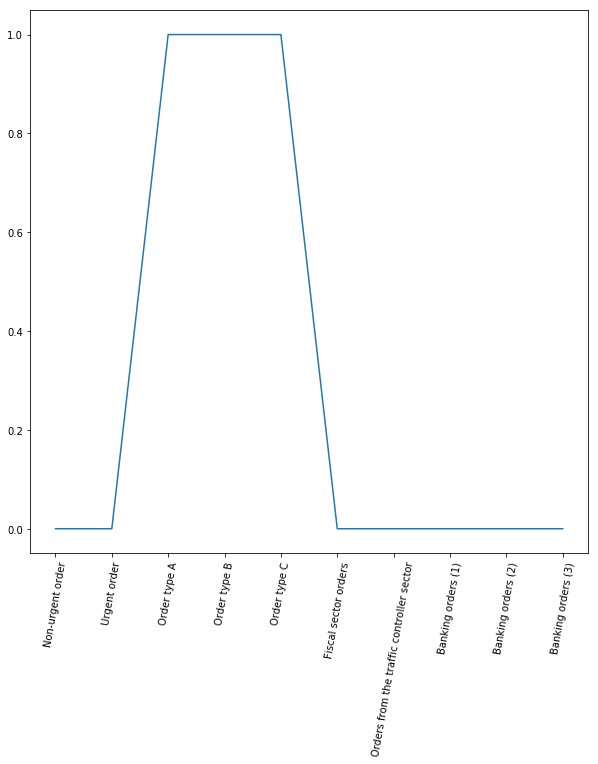

In [98]:
plt.show()